#Custom datasets with PyTorch


Building your own dataset to work with

some PyTorch domain libraries are:

1. TorchText --> https://pytorch.org/text/stable/datasets.html
2. TorchVision --> https://pytorch.org/vision/0.8/datasets.html
3. TorchAudio --> https://pytorch.org/audio/stable/datasets.html
4. TorchRec --> https://pytorch.org/torchrec/torchrec.datasets.html

In [1]:
#importing libraries and setting the device agnoistic code

import torch
import torchvision
from torch import nn
from torchvision import transforms, datasets


device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

#using the Food101 dataset -
original dataset has 101 classes of food with 1000 images- https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/


data used in this notebook is the subset of the main dataset with 3 classes and only 10% of the images

In [9]:
#getting the data

import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'


#if the image folder doesn't exist, download it and prepare it.
if image_path.is_dir():
  print(f'{image_path} directory already exists... skipping download')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents= True, exist_ok = True)

#download the data
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('downloading pizza, steak and sushi data...')
  f.write(request.content)

#unzipping the zip file
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
  print('Unzipping pizza, steak and sushi data...')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
downloading pizza, steak and sushi data...
Unzipping pizza, steak and sushi data...


#Data preparation and Data exploration

In [10]:
import os
def walk_through_dir(dir_path):
  #walks through dir path and returns its contents
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


In [11]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [12]:
#setup the training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

In [13]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#Visualising a random image from our data

glob - glob together all the images that suit a certain pattern
or stick them all together

In [14]:
#explaination of */*/*.jpg"

 the first star stands for the first dir eg. test, second star could be anything inside it eg. pizza, third star can be any random image inside pizza

random image path: data/pizza_steak_sushi/train/sushi/794647.jpg
image class: sushi
image height: 512
image width: 512


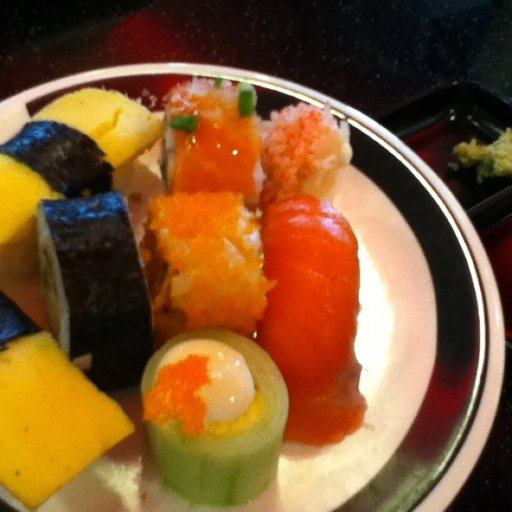

In [40]:
import random
from PIL import Image


#set seed
#random.seed(42)

#1. get every single image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))


#2. selecting a random image and visualising it.
random_image_path = random.choice(image_path_list)
random_image_path


#3. get the image class from the path name
image_class = random_image_path.parent.stem
image_class


#4. open image
img = Image.open(random_image_path)
img


#5. print metadata
print(f'random image path: {random_image_path}')
print(f'image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img


#Visualising images with matplotlib

(-0.5, 511.5, 511.5, -0.5)

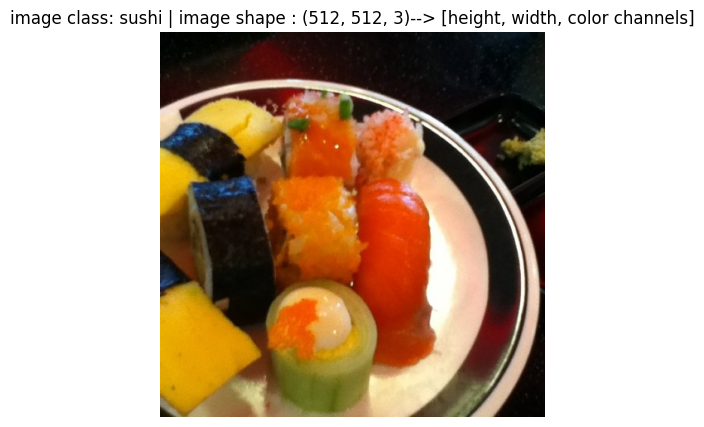

In [41]:
import matplotlib.pyplot as plt
import numpy as np


#turn the image into an array
img_as_array = np.asarray(img)

#plot the image
plt.figure(figsize=(5,5))
plt.imshow(img_as_array)
plt.title(f'image class: {image_class} | image shape : {img_as_array.shape}--> [height, width, color channels]')
plt.axis(False)

array([[[ 1,  3,  2],
        [ 2,  4,  3],
        [ 2,  4,  3],
        ...,
        [17, 21, 22],
        [18, 22, 23],
        [19, 23, 24]],

       [[ 1,  3,  2],
        [ 2,  4,  3],
        [ 2,  4,  3],
        ...,
        [13, 17, 18],
        [14, 18, 19],
        [15, 19, 20]],

       [[ 1,  3,  2],
        [ 2,  4,  3],
        [ 2,  4,  3],
        ...,
        [12, 16, 17],
        [13, 17, 18],
        [14, 18, 19]],

       ...,

       [[18, 19, 11],
        [17, 18, 10],
        [18, 18, 10],
        ...,
        [ 4,  3,  1],
        [ 5,  4,  2],
        [ 5,  4,  2]],

       [[18, 20, 17],
        [18, 19, 14],
        [20, 19, 15],
        ...,
        [ 3,  2,  0],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[15, 17, 16],
        [15, 17, 16],
        [18, 17, 15],
        ...,
        [ 3,  2,  0],
        [ 3,  2,  0],
        [ 4,  3,  1]]], dtype=uint8)
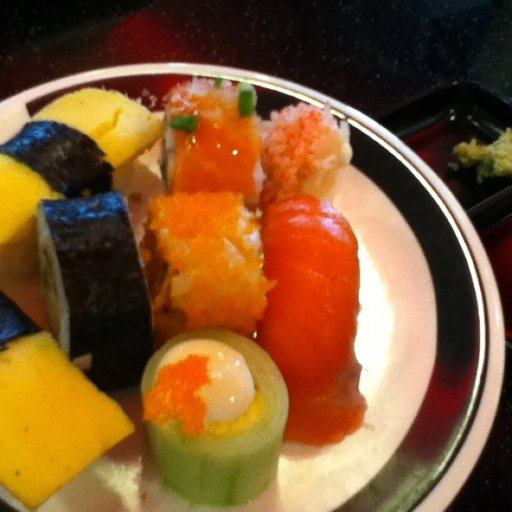

In [42]:
img_as_array